In [1]:
from fft import *
import matplotlib.pyplot as plt

In [2]:
def linear_convolution_direct(x, h):
    """
    Compute the linear convolution of x and h using np.convolve.
    This yields an output of length len(x)+len(h)-1.
    """
    return np.convolve(x, h, mode='full')

def linear_convolution_fft(x, h):
    """
    Compute the linear convolution using the FFT.
    Both x and h are zero-padded to length N = len(x)+len(h)-1 before
    computing the FFTs, so that the circular convolution computed via FFT
    corresponds to the linear convolution.
    """
    N = len(x) + len(h) - 1
    X = FFT1D(np.pad(x, (0, N - len(x))))
    H = FFT1D(np.pad(h, (0, N - len(h))))
    Y = IFFT1D(X * H)
    return Y

def arrays_almost_equal(a, b, tol=1e-6):
    """
    Checks if two input arrays are almost equal element-wise.
    """
    return np.allclose(a, b, atol=tol)

In [3]:
def convolution(x, h):
    """
    For now, let's start by assuming that x and h are the same size
    """
    n = len(x)
    y = np.zeros(n, dtype=complex)
    for k in range(n):
        for m in range(n):
            y[k] += x[m] * h[(k - m) % n]
    return y

def arrays_almost_equal(a, b, tol=1e-6):
    """
    Checks if the two input lists a and b are almost equal or not, with respect to a given tolerance "tol"
    """
    return np.allclose(a, b, atol=tol)

## Test 1: FFT and IFFT Correctness

Generate a random signal of arbitrary length, compute its FFT and then its IFFT, and verify that the recovered signal is close to the original.

In [4]:
x = np.random.random(10) + 1j * np.random.random(10)
X = FFT1D(x)
x_rec = IFFT1D(X)
print('Original signal:', x)
print('Recovered signal:', x_rec)
print('FFT/IFFT recovery successful:', arrays_almost_equal(x, x_rec))

Original signal: [1.26072854e-01+0.97233977j 3.64725019e-04+0.66731275j
 3.09959005e-01+0.67165705j 9.10878720e-01+0.48709363j
 4.08500117e-01+0.02380811j 5.00337684e-01+0.31308141j
 7.88983412e-01+0.29428665j 3.54555862e-01+0.61513193j
 6.24288612e-01+0.72891667j 3.79608248e-01+0.65597709j]
Recovered signal: [1.26072854e-01+0.97233977j 3.64725019e-04+0.66731275j
 3.09959005e-01+0.67165705j 9.10878720e-01+0.48709363j
 4.08500117e-01+0.02380811j 5.00337684e-01+0.31308141j
 7.88983412e-01+0.29428665j 3.54555862e-01+0.61513193j
 6.24288612e-01+0.72891667j 3.79608248e-01+0.65597709j]
FFT/IFFT recovery successful: True


## Test 2: Convolution and Multiplication Relationship

For two signals `x` and `h`, the convolution computed directly in the time domain should equal the result obtained by:

1. Computing the FFT of both signals
2. Multiplying the resulting spectra element-wise
3. Applying the IFFT to the product.

I perform both computations and compare the results.

In [5]:
signal_length = 64
filter_length = 8
signal = np.random.random(signal_length) + 1j * np.random.random(signal_length)
filter = np.random.random(filter_length) + 1j * np.random.random(filter_length)

y_direct = linear_convolution_direct(signal, filter)
y_fft = linear_convolution_fft(signal, filter)

print('\nDirect linear convolution:', y_direct)
print('\nFFT-based linear convolution:', y_fft)
print('\nConvolution and multiplication relationship holds:', arrays_almost_equal(y_direct, y_fft))


Direct linear convolution: [-0.86573339+0.11352762j -1.31756891+0.95619567j -0.59333022+1.47746395j
 -1.40355625+1.50534811j -2.14038176+2.50450491j -1.37289672+3.5145528j
 -0.7891749 +3.59317373j -0.95058587+3.35967085j -0.26348454+4.30095627j
 -0.52128026+3.572256j   -0.48625004+3.55722292j -0.15377272+3.97105538j
 -0.76885743+3.35642652j -1.09217882+4.40218691j -0.96769687+4.57070568j
 -0.07844278+5.14113893j -0.76943636+5.60853292j  0.09039297+5.63070338j
  0.79638435+4.72962772j  0.66811794+4.96405543j  0.67735231+4.84257539j
  1.54978099+4.51038637j  1.66939043+4.26216679j  0.62481556+3.18345888j
  0.09030415+3.69484639j -0.00276668+4.33932944j -0.39102548+3.53634865j
 -0.41687453+3.55413512j -0.85722481+3.7481287j  -1.34626024+3.00120644j
 -1.68327   +2.85591197j -1.46765871+3.55494437j -1.45356886+3.04142666j
 -1.0258907 +2.25038144j -1.9038113 +3.24243788j -2.00189561+3.65081382j
 -0.85768971+4.07323357j -0.66285078+4.71556899j -0.05637557+4.41267981j
 -0.04365402+4.60564564j

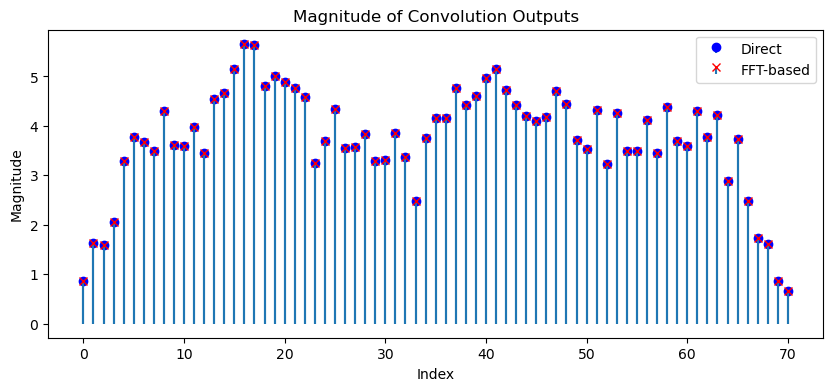

In [6]:
# Plot the results to visually verify the match
plt.figure(figsize=(10, 4))
plt.stem(np.abs(y_direct), markerfmt='bo', basefmt=" ", label='Direct')
plt.stem(np.abs(y_fft), markerfmt='rx', basefmt=" ", label='FFT-based')
plt.title('Magnitude of Convolution Outputs')
plt.xlabel('Index')
plt.ylabel('Magnitude')
plt.legend()
plt.show()